# VALUE-AT-RISK(VaR) Utilizando Montecarlo

Importamos las librerias

In [ ]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
import scipy.stats as scs

## Simulación de Montecarlo

Utilizamos la propuesta de Black-Scholes-Merton, para modelizar el comportamiento de un activo financiero
$$S_T=S_0e^{\left(\left(r-\frac{1}{2}\sigma^2\right)T+\sigma\sqrt{T}\mathit{z}\right)}$$
- $S_T$ valor del activo en el momento $T$
- $r$ rentabilidad libre de riesgo
- $\sigma $desviación típica del activo
- $\mathit{z}$ variable aleatorio $N(0,1)$

- `S0 = 100` Valor indicial del activo financiero
- `r = 0.05` Rentabilidad libre de riesgo
- `sigma = 0.25`Desviación típica del activo
- `T = 2.0` Tiempo transcurrido en fracciones de año. En este caso son dos años
- `I = 10000` Número de simulaciones.
- `ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +sigma * math.sqrt(T) * npr.standard_normal(I))` replicamos la formula anterior, pero con un matiz  `npr.standard_normal(I))` genera mil números aleatorios que se comportan como una $N(0,1)$


In [ ]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +sigma * math.sqrt(T) * npr.standard_normal(I))

Represantamos gráficamente el histográma de los posibles precios que puede tener el activo dentro de dos años.

(array([ 16.,  53., 128., 283., 481., 570., 741., 775., 828., 788., 779.,
        747., 609., 567., 475., 407., 352., 285., 176., 171., 174., 125.,
         88.,  83.,  64.,  50.,  36.,  37.,  31.,  15.,  11.,  11.,   9.,
          8.,   3.,   2.,   4.,   5.,   3.,   5.,   1.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 28.5423091 ,  35.80179391,  43.06127871,  50.32076352,
         57.58024832,  64.83973313,  72.09921793,  79.35870273,
         86.61818754,  93.87767234, 101.13715715, 108.39664195,
        115.65612676, 122.91561156, 130.17509636, 137.43458117,
        144.69406597, 151.95355078, 159.21303558, 166.47252039,
        173.73200519, 180.99149   , 188.2509748 , 195.5104596 ,
        202.76994441, 210.02942921, 217.28891402, 224.54839882,
        231.80788363, 239.06736843, 246.32685324, 253.58633804,
        260.84582284, 268.10530765, 275.36479245, 282.62427726,
        289.88376206, 297.14324687, 304.40273167, 311.66221648,
        318.921701

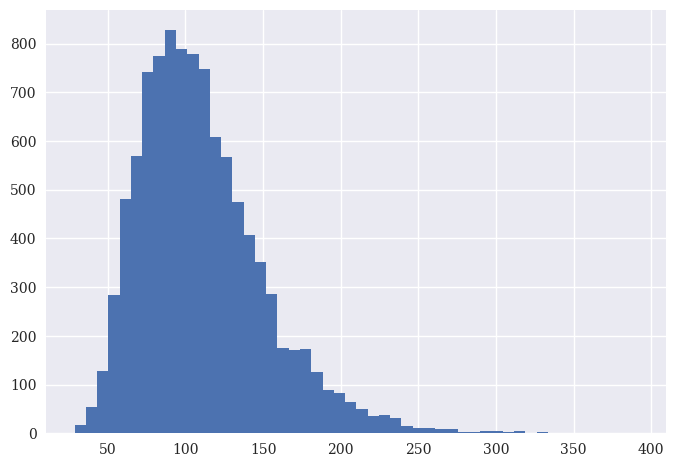

In [ ]:
plt.hist(ST1, bins=50)

La figura nos indice a pensar de que estamos ante una lognormal. Por ello utilizaremos `npr.lognormal`:
- media $\left(r-\frac{1}{2}\sigma^2\right)T$
- desviación típica $\sigma *\sqrt T$.

In [ ]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T, sigma * math.sqrt(T), size=I)

(array([  6.,  45., 103., 205., 359., 498., 658., 784., 861., 783., 816.,
        706., 656., 604., 545., 443., 329., 289., 232., 198., 170., 126.,
        115.,  99.,  81.,  64.,  48.,  40.,  29.,  18.,  21.,  14.,   8.,
         11.,   5.,   6.,   6.,   4.,   3.,   1.,   0.,   1.,   1.,   1.,
          3.,   1.,   2.,   0.,   0.,   2.]),
 array([ 26.36167918,  33.44539908,  40.52911898,  47.61283889,
         54.69655879,  61.7802787 ,  68.8639986 ,  75.9477185 ,
         83.03143841,  90.11515831,  97.19887821, 104.28259812,
        111.36631802, 118.45003793, 125.53375783, 132.61747773,
        139.70119764, 146.78491754, 153.86863744, 160.95235735,
        168.03607725, 175.11979716, 182.20351706, 189.28723696,
        196.37095687, 203.45467677, 210.53839667, 217.62211658,
        224.70583648, 231.78955639, 238.87327629, 245.95699619,
        253.0407161 , 260.124436  , 267.20815591, 274.29187581,
        281.37559571, 288.45931562, 295.54303552, 302.62675542,
        309.710475

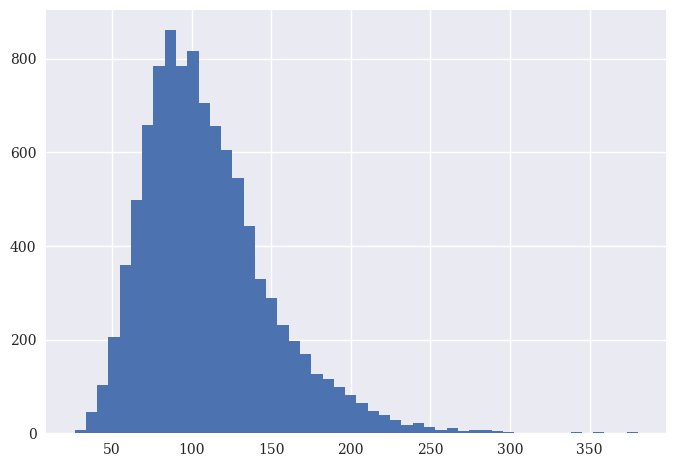

In [ ]:
plt.hist(ST2, bins=50)

Voy a crear una función para describir ambas funciones.
La instrucción `scs.describe(a1)` me proporciona los estadísticos siguientes de una serie.

0. nobs: El número de observaciones o elementos en los datos.
1. minmax: Una tupla con el valor mínimo y máximo de los datos, respectivamente.
2. mean: El valor medio de los datos.
3. variance: La varianza de los datos, que es una medida de la dispersión de los datos alrededor de la media.
4. skewness: La asimetría de los datos, que es una medida de la falta de simetría en la distribución de los datos.  Una distribución simétrica tiene una asimetría de 0.
5. kurtosis: La curtosis de los datos, que es una medida de la "agudeza" o "pesadez" de las colas de la distribución. Indica cuán pronunciadas son las colas en relación con el resto de la distribución.


In [ ]:
def print_statistics(a1, a2):
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print ("%14s %14s %14s" %("statistic", "data set 1", "data set 2"))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

Podemos apreciar que las series son bastantes similares. Las diferencias se deben error de muestreo (sampling error) y se debe a la discrepancia o error que surge debido a la variabilidad inherente en seleccionar muestras aleatorias de una población, especialmente cuando estas muestras se utilizan para simular y predecir comportamientos o tendencias en un sistema más amplio o en la población total.

In [ ]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         28.542         26.362
           max        391.517        380.548
          mean        110.625        110.156
           std         40.440         40.380
          skew          1.097          1.159
      kurtosis          2.045          2.417


# Procesos estocásticos

Un proceso estocástico es una secuencia de variables aleatorias. Podríamos verlo como una secuencia de simulaciones de variables aleatorias. Los resultados no son independientes entre si, pero fundamentalmente dependen del resultado previo. Los procesos estocásticos utilizados en finanzas siguen la regla de Markov, que indica que el precio de mañana sólo depende del estado del proceso hoy y no de los precios históricos.  Es un proceso sin memoria. Lo cúal teóricamente hablando es esencial para garantizar la eficiencia de mercado.

## Proceso Geométrico Browniano

$Z_t$ es un preceso Browniano standard. La ecuación diferencial que define un proceso geométrico Browiano es la siguiente:
$$dS_t=rS_tdt+\sigma S_t dZ_t$$

Como consecuencia de ello los valores de $S_t$ siguen una distribución log-normal y su rentabilidad marginal $\frac{dS_t}{S_t}$ se comporta como una normal.

Si aplicamos el esquema de Euler para pasar de tiempo continuo a tiempo discreto llegamos a la expresión de Black-Schole-Merton
$$ S_t=S_{t-\bigtriangleup t}exp\left[\left(r-\frac{1}{2}\sigma^2\right)\bigtriangleup t+\sigma\sqrt{\bigtriangleup t}z_t\right] $$

Para realizar la simulación de las sendas voy a crearme `S = np.zeros((M + 1, I))` un matriz de $M$ columnas una por cada intervalo de tiempo e $I$ filas.

In [ ]:
I=10000 #número de sendas simuladas
M= 50 # número de intervalos de tiempo
dt= T/M # longitud del intervalo en fracciones de año
S = np.zeros((M + 1, I))
S[0]=S0 # Valor inicial del activo

Genero un bucle que va desde 1 a 50 (`for t in range(1, M + 1):`) en cada columna guardo las mil simulaciones (mil filas) realizadas sobre el comportamiento del precio en `t+1`

In [ ]:
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +sigma * math.sqrt(dt) * npr.standard_normal(I))


Vamos a representar gráficamente el resultado en el momento `T`

(array([ 9.,  7., 23., 33., 49., 54., 50., 68., 75., 89., 77., 39., 59.,
        65., 41., 39., 40., 25., 26., 25., 25., 11., 14.,  6.,  8.,  6.,
        11.,  1.,  8.,  2.,  1.,  3.,  2.,  0.,  3.,  1.,  4.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 36.92008007,  43.15593344,  49.3917868 ,  55.62764017,
         61.86349354,  68.09934691,  74.33520028,  80.57105364,
         86.80690701,  93.04276038,  99.27861375, 105.51446712,
        111.75032048, 117.98617385, 124.22202722, 130.45788059,
        136.69373396, 142.92958732, 149.16544069, 155.40129406,
        161.63714743, 167.87300079, 174.10885416, 180.34470753,
        186.5805609 , 192.81641427, 199.05226763, 205.288121  ,
        211.52397437, 217.75982774, 223.99568111, 230.23153447,
        236.46738784, 242.70324121, 248.93909458, 255.17494795,
        261.41080131, 267.64665468, 273.88250805, 280.11836142,
        286.35421479, 292.59006815, 298.82592152, 305.06177489,
        311.

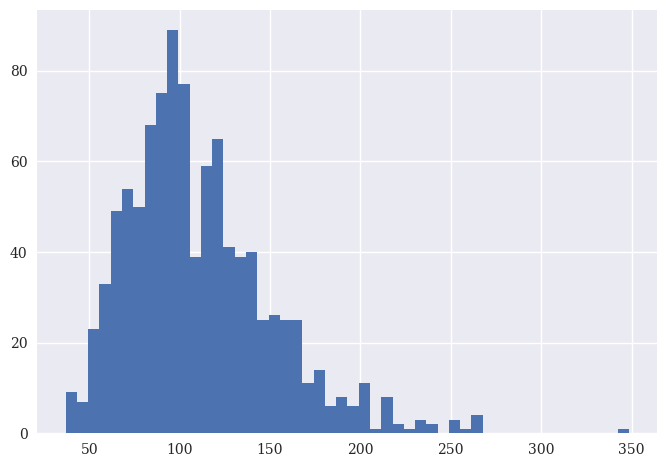

In [ ]:
plt.hist(S[-1], bins=50)

In [ ]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size       1000.000      10000.000
           min         36.920         26.362
           max        348.713        380.548
          mean        110.655        110.156
           std         40.461         40.380
          skew          1.117          1.159
      kurtosis          2.143          2.417


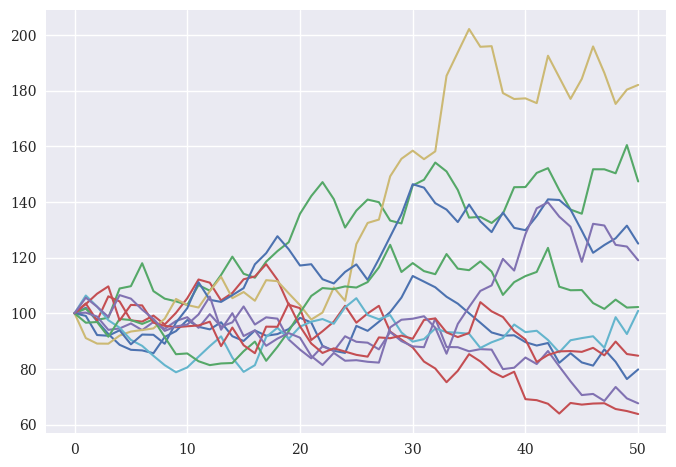

In [ ]:
plt.plot(S[:, :10], lw=1.5)

Vamos a simular el comportamiento de un activo a partir de la ecuación de Black-Scholes-Merton, para los próximos 30 días.

In [ ]:
S0 = 100 # precio inicial
r = 0.05 # rentabilidad libre de riesgo
sigma = 0.25 # desviación típica del activo
T = 30 / 365 # próximos 30 días
I = 10000 # número de simulaciones
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T+ sigma * np.sqrt(T) * npr.standard_normal(I))

In [ ]:
R_gbm = np.sort(ST - S0) # calcula la rentabilidad y ordenalas

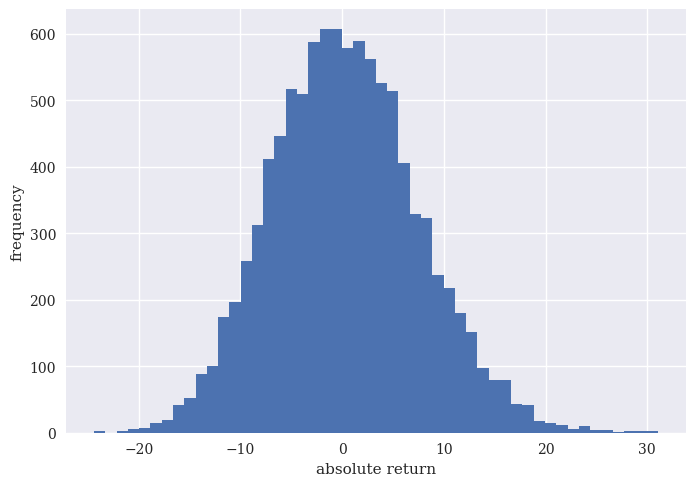

In [ ]:
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

Estimaros el Value-at-Risk (VaR) para distintos percentiles de una distribución de rendimientos.
1. Definimos los percentiles: `percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0] `

2. Calculamos el V@R para los distintos percentiles: `var = scs.scoreatpercentile(R_gbm, percs)`

    Aquí, `scs.scoreatpercentile` es una función de la biblioteca `scipy.stats` que se utiliza para calcular el valor en la distribución de rendimientos `R_gbm` en los percentiles específicos definidos en `percs`.

3. Creamos un encabezado de tabla:`print ("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))`subrayado con raya discontinua `print (33 * "-")`
    - "%16s %16s": esta parte es una cadena de formato. Le dice a Python cómo formatear las cadenas que estamos a punto de imprimir.
        - `%s` es un marcador de posición para una cadena.
        - `16` especifica que la cadena debe ocupar un espacio de 16 caracteres. Si la cadena es más corta que 16 caracteres, el espacio restante se llenará con espacios. Esto asegura que cada encabezado tenga al menos 16 caracteres de ancho, haciendo que los encabezados estén alineados y el resultado se vea ordenado.
        - El operador `%` se utiliza aquí para aplicar los valores de las variables a los marcadores de posición en la cadena de formato. Es una característica de las versiones antiguas de Python para el formateo de cadenas, conocida como "formateo de cadenas antiguo".
        - `('Confidence Level', 'Value-at-Risk')`: Esta es una tupla que contiene las cadenas que queremos formatear e imprimir. 'Confidence Level' se sustituirá por el primer %16s y 'Value-at-Risk' por el segundo %16s.

4. Bucle para imprimir los percentiles con sus valores correspondientes:

    `for pair in zip(percs, var):`
        `print ("%16.2f %16.3f" % (100 - pair[0], -pair[1]))`

    Esta parte del código utiliza un bucle para iterar a través de los percentiles y los valores correspondientes calculados (es decir, los valores de VaR).

    - `zip(percs, var)` combina los percentiles con sus valores de VaR correspondientes.
    - Para cada par (percentil, valor), `calcula 100 - pair[0]` para obtener el nivel de confianza correspondiente
    - `- pair[1]` se utiliza para cambiar el signo del VaR. En el contexto del riesgo financiero, VaR es comúnmente representado como un número negativo, indicando una pérdida.
    - La cadena de formato `"%16.2f %16.3f"` indica cómo se deben formatear los números cuando se convierten en cadenas. Esto es particularmente útil para alinear números en una tabla y controlar cuántos decimales se deben mostrar. Vamos a desglosar cada parte de esta cadena de formato:

        - `%16.2f`:

            - `%` indica el comienzo de un especificador de formato.
            - `16` especifica el ancho total del campo donde se imprimirá el número, incluyendo decimales, punto decimal y cualquier espacio en blanco extra. Si el número resultante es más corto que este ancho, el espacio restante se llenará con espacios en blanco. Esto asegura que los números estén alineados en la columna.
            - `.2` indica que el número debe ser redondeado y mostrado con exactamente dos dígitos después del punto decimal.
            - `f` indica que el número se debe mostrar en formato de punto flotante (es decir, un número decimal).
        - `%16.3f`:
            - Similar al anterior, pero .3 indica que el número debe ser redondeado y mostrado con exactamente tres dígitos después del punto decimal.
    


In [ ]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print ("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print (33 * "-")
for pair in zip(percs, var):
    print ("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           23.619
           99.90           21.118
           99.00           15.327
           97.50           12.869
           95.00           10.833
           90.00            8.531


# Principales ratios de performance de una cartera

## Ratio de Sharpe

##SR=\frac{E(r_p)-r_f}{\sigma_p}##

## Max Drawdown

La reducción máxima mide la pérdida máxima desde el punto más alto de la estrategia (su pico) hasta el punto más bajo.

$$MDD= min \frac{V_{it}-max_{\tau-t}V_{it}}{max_{\tau -t}V_{it}}$$

donde $max_{\tau-t}V_{it}$ es el valor máximo de la estrategia antes del momento $t$, y $V_{it}$ es el valor actual del activo o estrategia $i$ en el momento $t$.

## Ratio de Sortino

$$SOR=\frac{E(r_p)-r_f}{\sigma_{p,downside}}$$

donde ${\sigma_{p,downside}}$ es la beta cuando las rentabilidades son negativas, mide la retribución que ofrece la cartera teniendo en cuenta la dispersión que asumimos en periodos bajistas, como medida más ajustada del riesgo.


## Ratio de Calmar 

$$CR=\frac{E(r_p)-r_f}{MDD_p} $$

Mide la rentabilidad que obtenemos en función de la pérdida máxima.